# Exploratory Data Analysis

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [2]:
categorical_train = pd.read_excel("files/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
functional_train = pd.read_csv("files/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
quantitative_train = pd.read_excel("files/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")
solution_train = pd.read_excel("files/TRAIN/TRAINING_SOLUTIONS.xlsx")

In [3]:
categorical_train

participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0      UmrK0vMLopoR                     2016                       1   
1      CPaeQkhcjg7d                     2019                       3   
2      Nb4EetVPm3gs                     2016                       1   
3      p4vPhVu91o4b                     2018                       3   
4      M09PXs7arQ5E                     2019                       3   
...             ...                      ...                     ...   
1208   Atx7oub96GXS                     2019                       1   
1209   groSbUfkQngM                     2016                       1   
1210   zmxGvIrOD0bt                     2015                       1   
1211   rOmWFuJCud5G                     2018                       3   
1212   k8HhHnnu2wmt                     2018                       3   

      PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                                  0.0                            0   
1                                  1.0                            2   
2                                  1.0                            8   
3                                  0.0                            8   
4                                  0.0                            1   
...                                ...                          ...   
1208                               0.0                            0   
1209                               0.0                            0   
1210                               1.0                            2   
1211                               0.0                            8   
1212                               1.0                            2   

      MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                           1                      21                      45   
1                           3                      15                      15   
2                           1                      18                      40   
3                           3                      15                      30   
4                           3                      15                      20   
...                       ...                     ...                     ...   
1208                        2                      21                      40   
1209                        1                      18                      35   
1210                        1                      18                      20   
1211                        3                      21                      40   
1212                        2                      21                      40   

      Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                         21                      45  
1                          0                       0  
2                          0                       0  
3                         18                       0  
4                          0                       0  
...                      ...                     ...  
1208                      21                      40  
1209                       0                       0  
1210                       0                       0  
1211                      18                      45  
1212                      18                      45  

[1213 rows x 10 columns]

In [4]:
functional_train

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0      70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1      WHWymJu6zNZi          0.029580          0.179323          0.112933   
2      4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3      obEacy4Of68I          0.016273          0.204702          0.115980   
4      s7WzzDcmDOhF          0.065771          0.098714          0.097604   
...             ...               ...               ...               ...   
1208   kTurROKp5YHQ          0.022932          0.024830         -0.006514   
1209   FCRyMz9O6yCq          0.047078          0.135955          0.144366   
1210   vm2P1hmAY1hl          0.094541          0.145280          0.061964   
1211   OFxvN8lnw21w         -0.001533          0.128562          0.045000   
1212   9gpepMI9sj5q         -0.115224          0.147713          0.083183   

      0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0             0.015141          0.070221          0.063997          0.055382   
1             0.038291          0.104899          0.064250          0.008488   
2             0.046991          0.111085          0.026978          0.151377   
3             0.043103          0.056431          0.057615          0.055773   
4             0.112988          0.071139          0.085607          0.019392   
...                ...               ...               ...               ...   
1208          0.021070          0.093365          0.083369          0.010991   
1209          0.054938          0.065760          0.113550          0.032621   
1210          0.030562          0.078278          0.105857          0.043984   
1211         -0.008742          0.003673          0.086494          0.090101   
1212          0.054649          0.034871         -0.046438         -0.006836   

      0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0            -0.035335          0.068583  ...              0.003404   
1             0.077505         -0.004750  ...             -0.008409   
2             0.021198          0.083721  ...              0.053245   
3             0.075030          0.001033  ...             -0.023918   
4            -0.036403         -0.020375  ...              0.066439   
...                ...               ...  ...                   ...   
1208          0.035838          0.023909  ...              0.060060   
1209          0.025349          0.011848  ...              0.021318   
1210          0.039145          0.032024  ...             -0.052990   
1211         -0.037449         -0.026334  ...              0.024479   
1212          0.058453          0.044953  ...              0.063316   

      195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
0                -0.010359             -0.050968             -0.014365   
1                -0.008479              0.020891              0.017754   
2                -0.028003              0.028773              0.024556   
3                -0.005356              0.018607              0.016193   
4                -0.076680             -0.047530             -0.031443   
...                    ...                   ...                   ...   
1208             -0.003911             -0.016413              0.089110   
1209              0.020141             -0.020920              0.030450   
1210             -0.002118             -0.038452              0.066608   
1211             -0.036995             -0.061617             -0.001699   
1212             -0.001991              0.044733              0.022353   

      196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
0                 0.128066              0.112646             -0.058980   
1                 0.094040              0.035141              0.032537   
2                 0.166343              0.058925              0.035485   
3                 0.072955              0.130135              0.056120   
4      

In [5]:
quantitative_train

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0      UmrK0vMLopoR          40.00                    13               3   
1      CPaeQkhcjg7d         -94.47                    14               3   
2      Nb4EetVPm3gs         -46.67                    14               4   
3      p4vPhVu91o4b         -26.68                    10               5   
4      M09PXs7arQ5E           0.00                    14               5   
...             ...            ...                   ...             ...   
1208   Atx7oub96GXS          87.80                    14               5   
1209   groSbUfkQngM          77.80                    14               3   
1210   zmxGvIrOD0bt          16.68                    14               3   
1211   rOmWFuJCud5G          53.40                    14               3   
1212   k8HhHnnu2wmt         -57.80                    14               5   

      APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0                 10               47               13              11   
1                 13               34               18              23   
2                 10               35               16              10   
3                 12               39               19              16   
4                 15               40               20              24   
...              ...              ...              ...             ...   
1208              14               39               20              15   
1209              10               32               20              11   
1210              16               28               15              19   
1211              14               34               18              23   
1212              11               42               18              16   

      APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0                 28                         0                           6   
1                 30                         0                          18   
2                 29                         1                          14   
3                 28                         6                          24   
4                 28                         1                          18   
...              ...                       ...                         ...   
1208              21                         1                           9   
1209              23                         6                          18   
1210              27                         3                           4   
1211              23                         4                           9   
1212              24                         3                          12   

      SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                              1                      5   
1                              6                      8   
2                              2                      8   
3                              4                     16   
4                              4                     11   
...                          ...                    ...   
1208                           2                      7   
1209                           3                     11   
1210                           1                      3   
1211                           0                      9   
1212                           0                     12   

      SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                             0                      5                      1   
1                             7                      8                     10   
2                             5                      7                      6   
3                             9                     10                      8   
4                             4                     10                      7   
...                         ...                    ...                 

In [6]:
solution_train

participant_id  ADHD_Outcome  Sex_F
0      UmrK0vMLopoR             1      1
1      CPaeQkhcjg7d             1      0
2      Nb4EetVPm3gs             1      0
3      p4vPhVu91o4b             1      1
4      M09PXs7arQ5E             1      1
...             ...           ...    ...
1208   Atx7oub96GXS             0      0
1209   groSbUfkQngM             0      1
1210   zmxGvIrOD0bt             0      1
1211   rOmWFuJCud5G             0      0
1212   k8HhHnnu2wmt             0      0

[1213 rows x 3 columns]

In [7]:
# exclude functional matrices for right now
df2 = pd.merge(quantitative_train, solution_train)
df = pd.merge(categorical_train, df2)
df

participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0      UmrK0vMLopoR                     2016                       1   
1      CPaeQkhcjg7d                     2019                       3   
2      Nb4EetVPm3gs                     2016                       1   
3      p4vPhVu91o4b                     2018                       3   
4      M09PXs7arQ5E                     2019                       3   
...             ...                      ...                     ...   
1208   Atx7oub96GXS                     2019                       1   
1209   groSbUfkQngM                     2016                       1   
1210   zmxGvIrOD0bt                     2015                       1   
1211   rOmWFuJCud5G                     2018                       3   
1212   k8HhHnnu2wmt                     2018                       3   

      PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                                  0.0                            0   
1                                  1.0                            2   
2                                  1.0                            8   
3                                  0.0                            8   
4                                  0.0                            1   
...                                ...                          ...   
1208                               0.0                            0   
1209                               0.0                            0   
1210                               1.0                            2   
1211                               0.0                            8   
1212                               1.0                            2   

      MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                           1                      21                      45   
1                           3                      15                      15   
2                           1                      18                      40   
3                           3                      15                      30   
4                           3                      15                      20   
...                       ...                     ...                     ...   
1208                        2                      21                      40   
1209                        1                      18                      35   
1210                        1                      18                      20   
1211                        3                      21                      40   
1212                        2                      21                      40   

      Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  ...  \
0                         21                      45  ...   
1                          0                       0  ...   
2                          0                       0  ...   
3                         18                       0  ...   
4                          0                       0  ...   
...                      ...                     ...  ...   
1208                      21                      40  ...   
1209                       0                       0  ...   
1210                       0                       0  ...   
1211                      18                      45  ...   
1212                      18                      45  ...   

      SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                              1                      5   
1                              6                      8   
2                              2                      8   
3                              4                     16   
4                              4                     11   
...                          ...                    ...   
1208                           2                      7   
1209                           3                     11   
1210                           1                  

In [8]:
print('No ADHD:', (df['ADHD_Outcome'] == 0).sum())
print('ADHD:', (df['ADHD_Outcome'] == 1).sum())
print('Male:', (df['Sex_F'] == 0).sum())
print('Female:', (df['Sex_F'] == 1).sum())

No ADHD: 382
ADHD: 831
Male: 797
Female: 416


Note that there are about twice the amount of males as there are females in the dataset.

In [9]:
df.isna().sum()

participant_id                        0
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity     11
PreInt_Demos_Fam_Child_Race           0
MRI_Track_Scan_Location               0
Barratt_Barratt_P1_Edu                0
Barratt_Barratt_P1_Occ                0
Barratt_Barratt_P2_Edu                0
Barratt_Barratt_P2_Occ                0
EHQ_EHQ_Total                         0
ColorVision_CV_Score                  0
APQ_P_APQ_P_CP                        0
APQ_P_APQ_P_ID                        0
APQ_P_APQ_P_INV                       0
APQ_P_APQ_P_OPD                       0
APQ_P_APQ_P_PM                        0
APQ_P_APQ_P_PP                        0
SDQ_SDQ_Conduct_Problems              0
SDQ_SDQ_Difficulties_Total            0
SDQ_SDQ_Emotional_Problems            0
SDQ_SDQ_Externalizing                 0
SDQ_SDQ_Generating_Impact             0
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0


                                  Basic_Demos_Enroll_Year  \
Basic_Demos_Enroll_Year                          1.000000   
Basic_Demos_Study_Site                           0.498110   
PreInt_Demos_Fam_Child_Ethnicity                -0.030768   
PreInt_Demos_Fam_Child_Race                      0.017209   
MRI_Track_Scan_Location                          0.712167   
Barratt_Barratt_P1_Edu                           0.118140   
Barratt_Barratt_P1_Occ                           0.061509   
Barratt_Barratt_P2_Edu                           0.103347   
Barratt_Barratt_P2_Occ                           0.097671   
EHQ_EHQ_Total                                    0.060649   
ColorVision_CV_Score                             0.122806   
APQ_P_APQ_P_CP                                  -0.033205   
APQ_P_APQ_P_ID                                   0.069347   
APQ_P_APQ_P_INV                                  0.038358   
APQ_P_APQ_P_OPD                                 -0.024302   
APQ_P_APQ_P_PM          

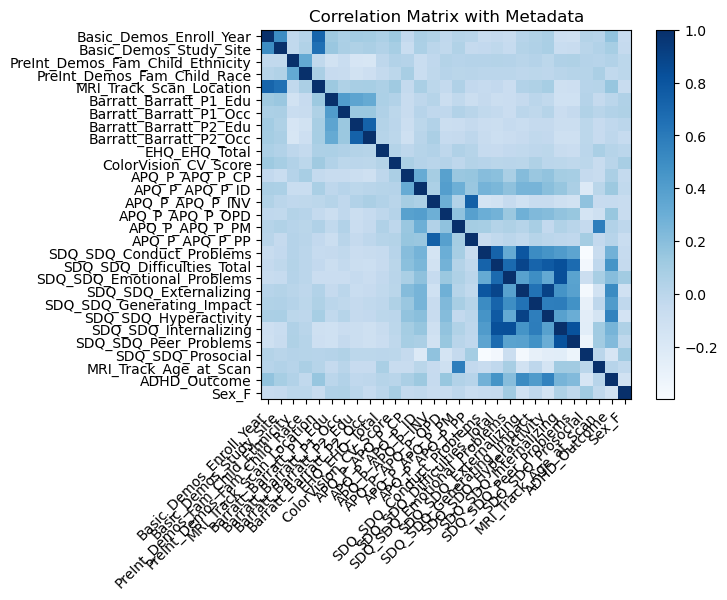

In [10]:
# create a correlation matrix so we know which categorical and quantitative features are most highly correlated with the label
# those that are not we can drop to reduce unecessary computing power
corr_df = df.drop(columns=['participant_id'])
corr_matrix = corr_df.corr()
print(corr_matrix)

plt.imshow(corr_matrix, cmap='Blues')
plt.colorbar()

variables = []
for i in corr_matrix.columns:
    variables.append(i)

plt.title("Correlation Matrix with Metadata")
plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

plt.show()

From this, we can see that SDQ_SDQ_Conduct_Problems, SDQ_SDQ_Difficulties_Total, SDQ_SDQ_Emotional_Problems, SDQ_SDQ_Externalizing, SDQ_SDQ_Generating_Impact, SDQ_SDQ_Hyperactivity, SDQ_SDQ_Internalizing, and SDQ_SDQ_Peer_Problems correlate highest with ADHD_Outcome.                      

# Checking outliers in chosen features

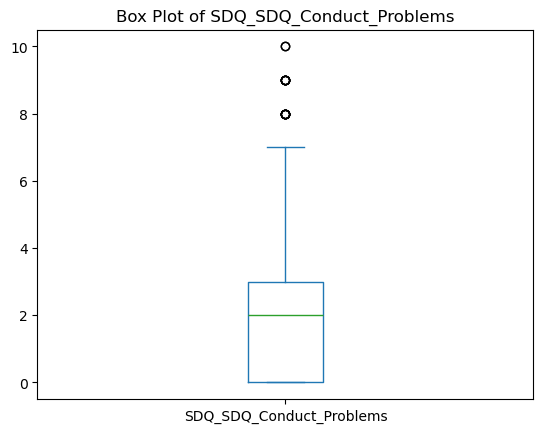

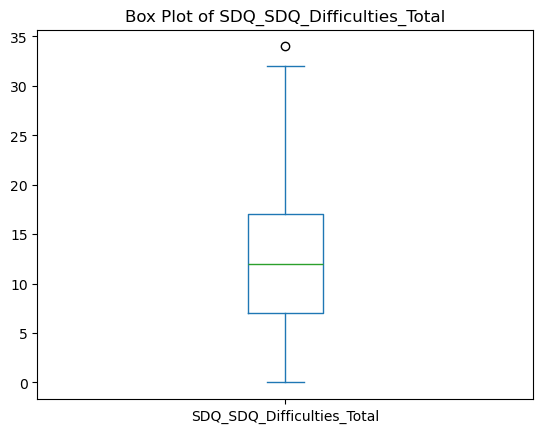

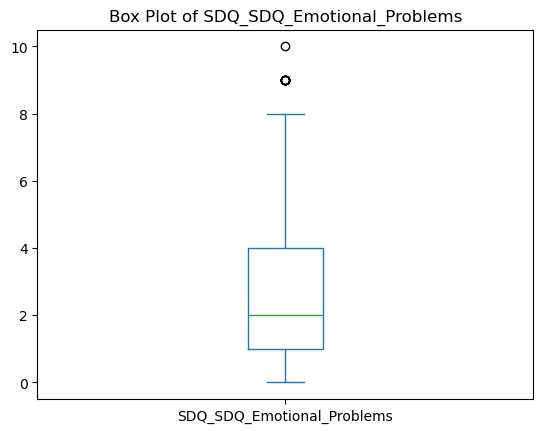

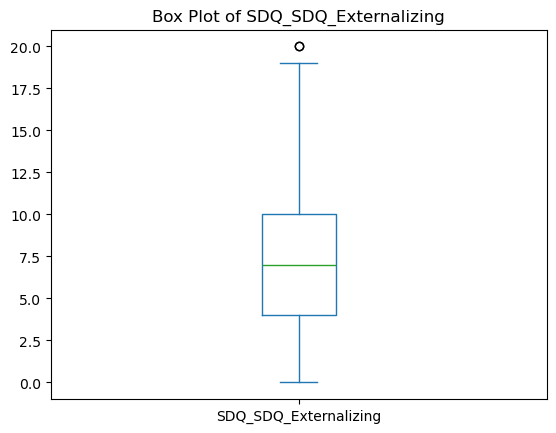

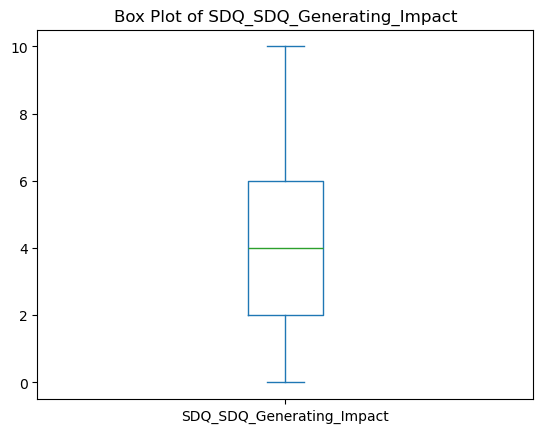

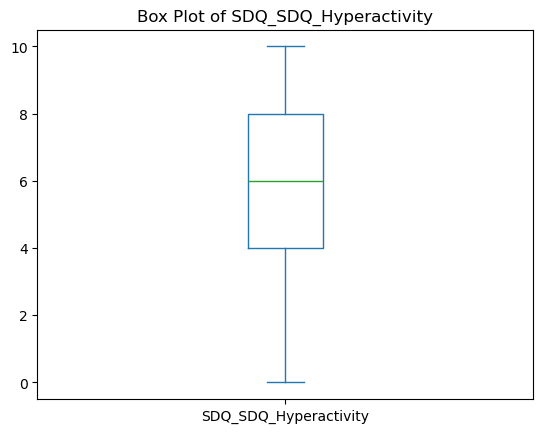

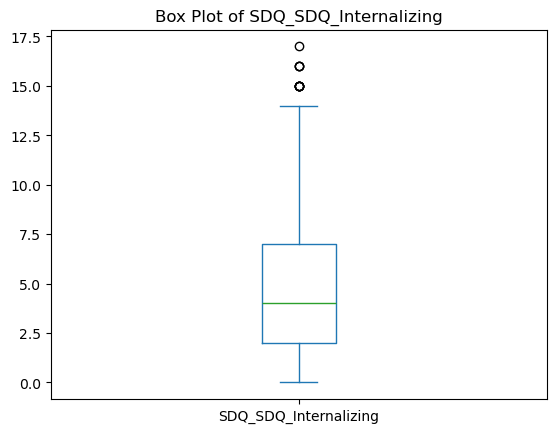

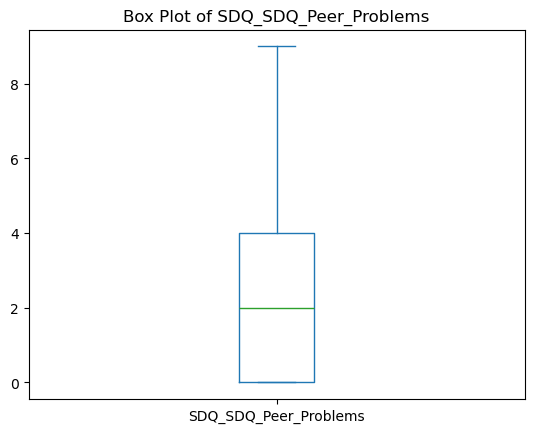

In [86]:
features = ['SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 
            'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems']
for f in features:
    df[f].plot.box()
    plt.title('Box Plot of '+ f)
    plt.show()

SDQ_SDQ_Internalizing, SDQ_SDQ_Externalizing, SDQ_SDQ_Emotional_Problems, SDQ_SDQ_Conduct_Problems have outliers.

# Functional Connectome Visualizations of First 10 Subjects

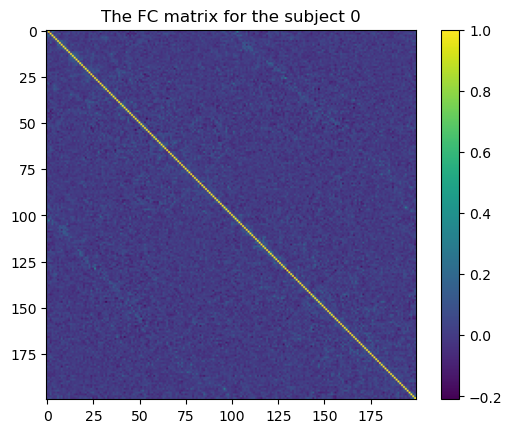

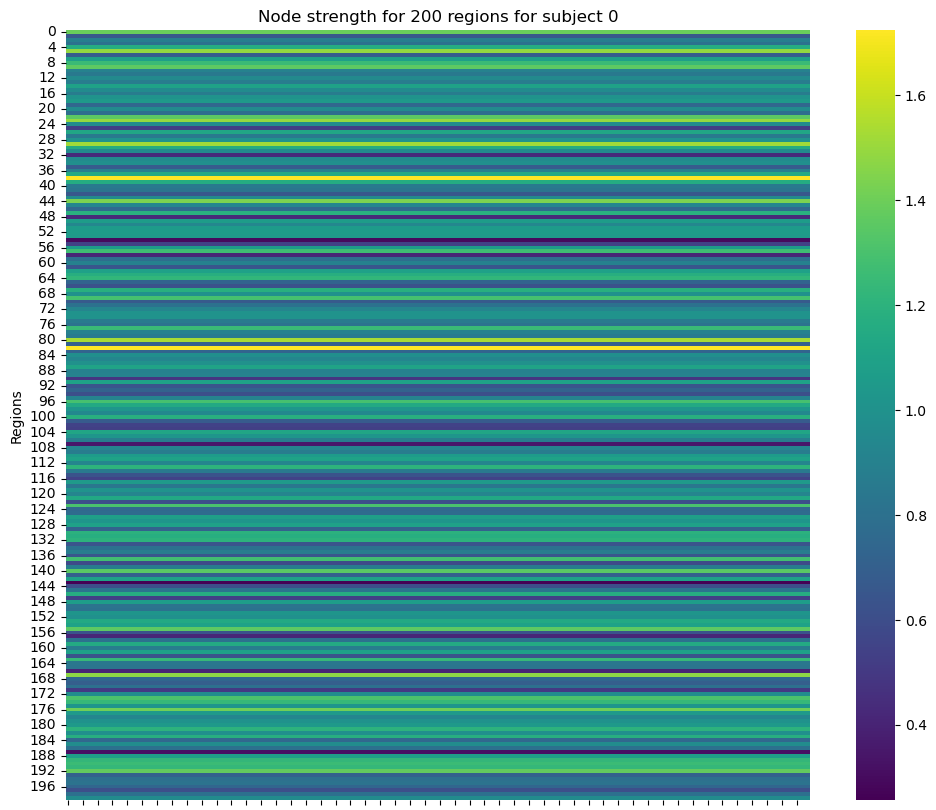

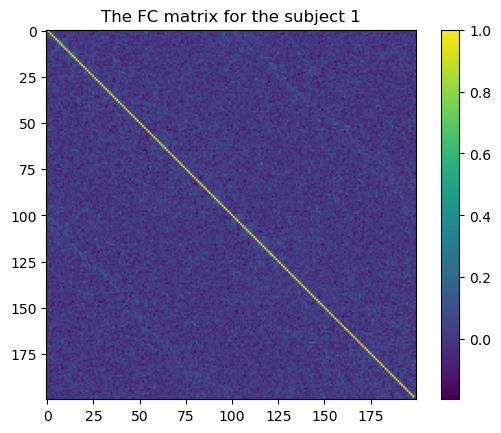

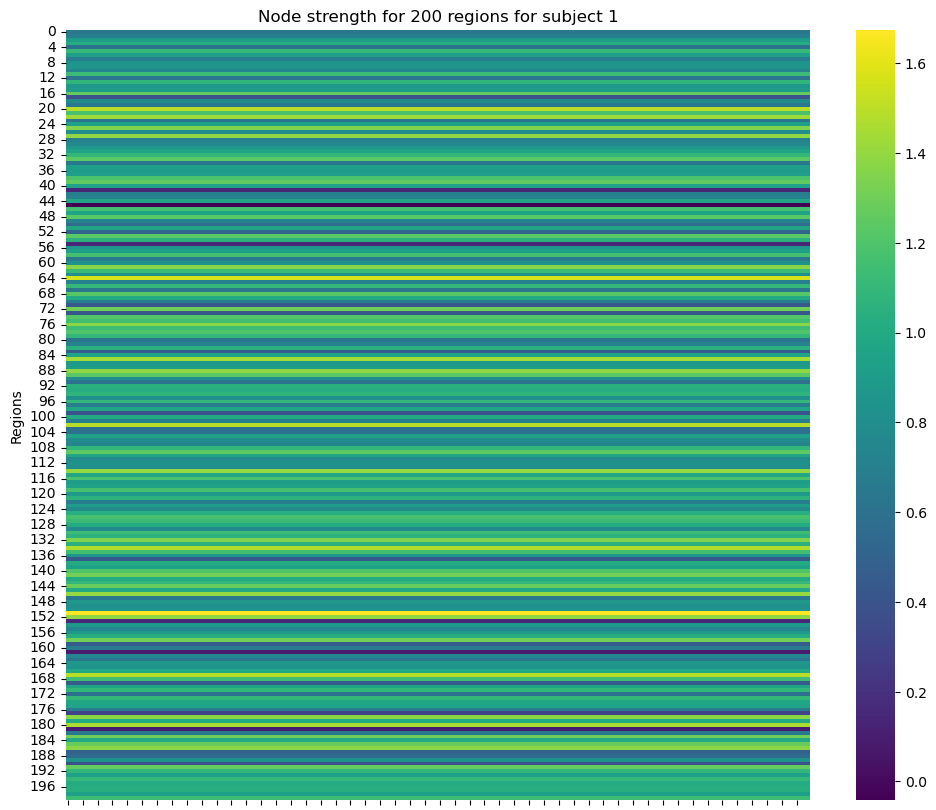

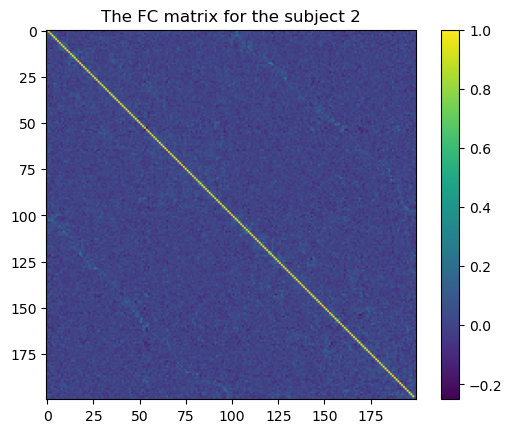

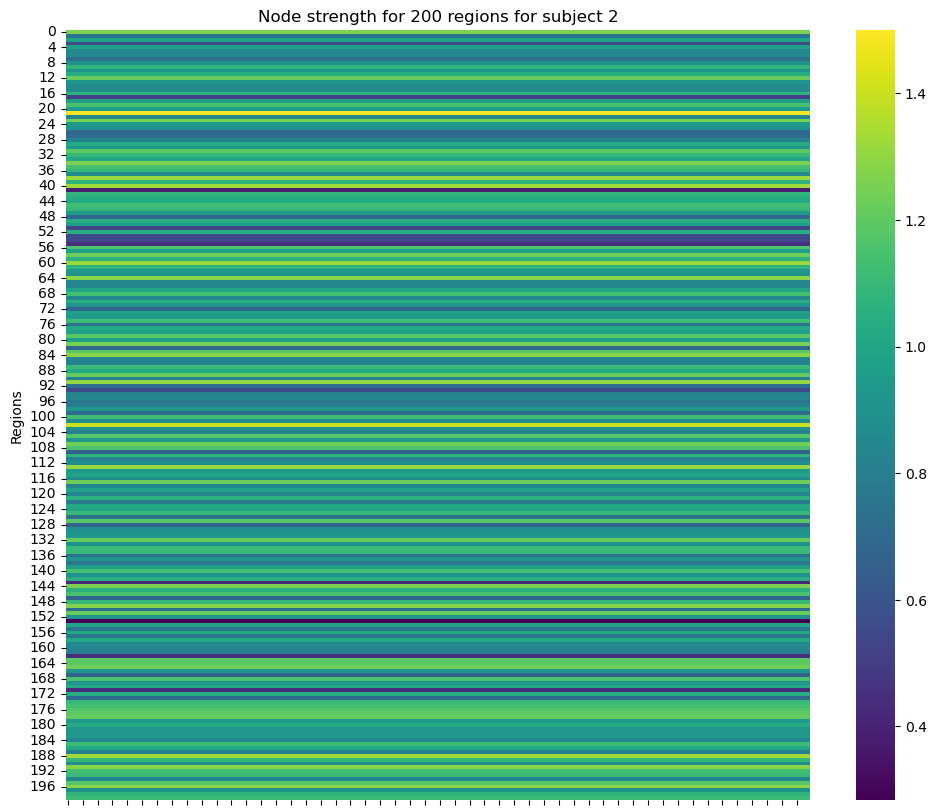

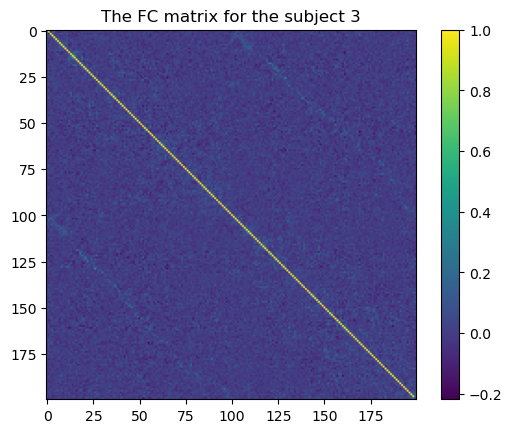

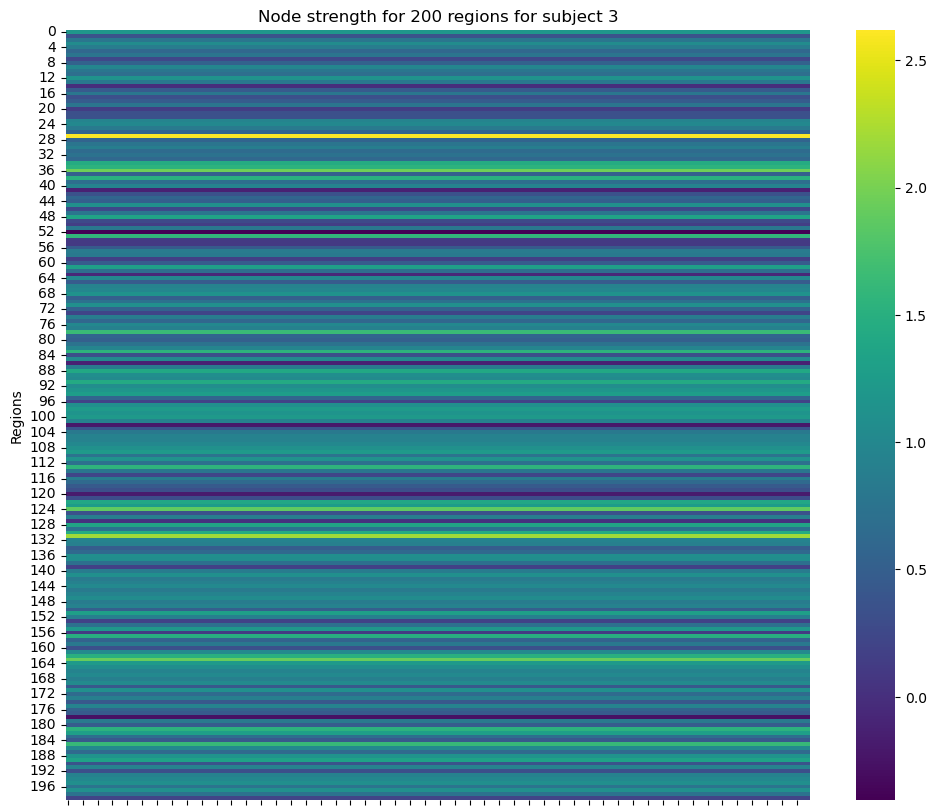

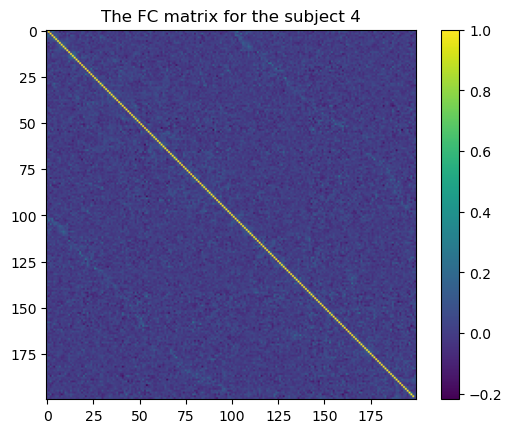

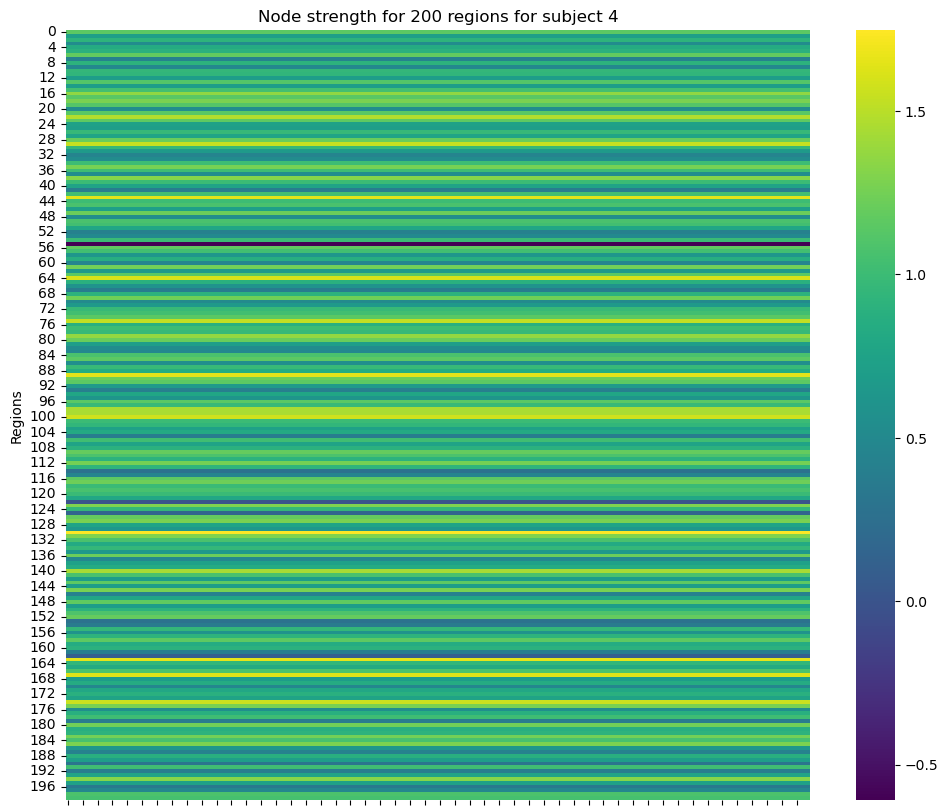

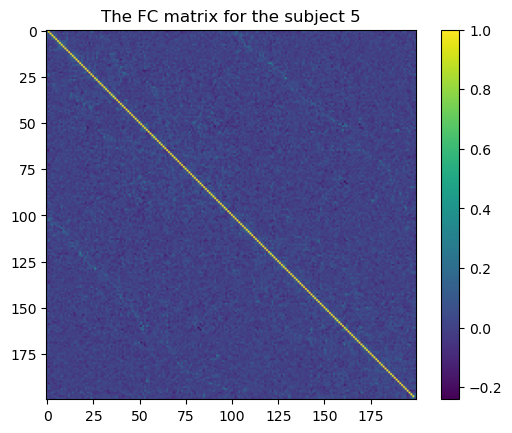

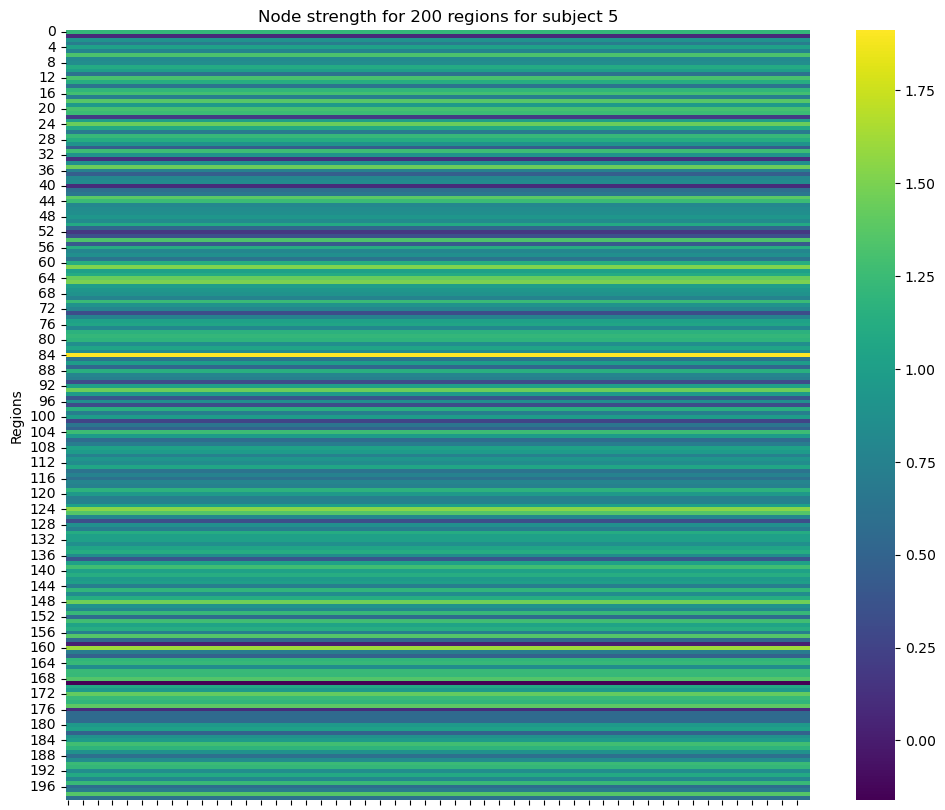

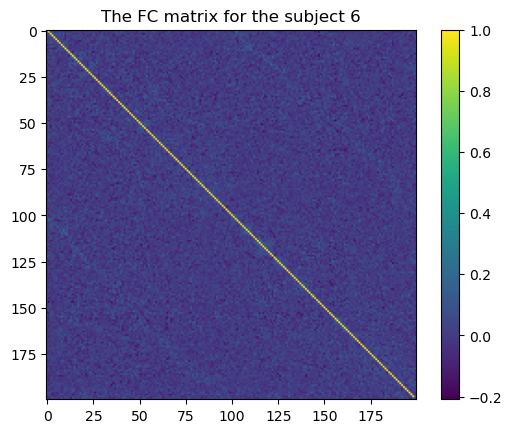

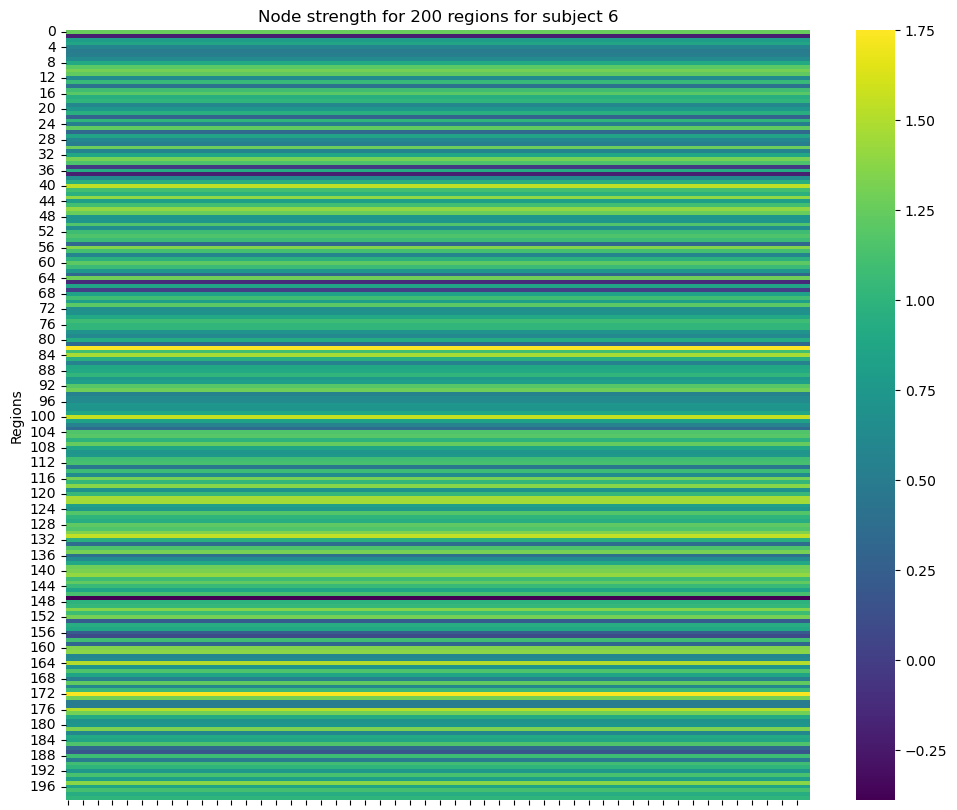

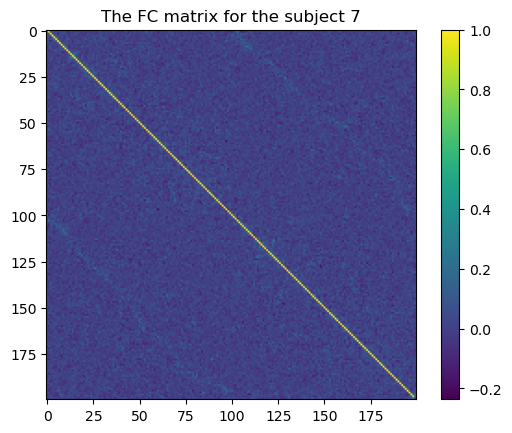

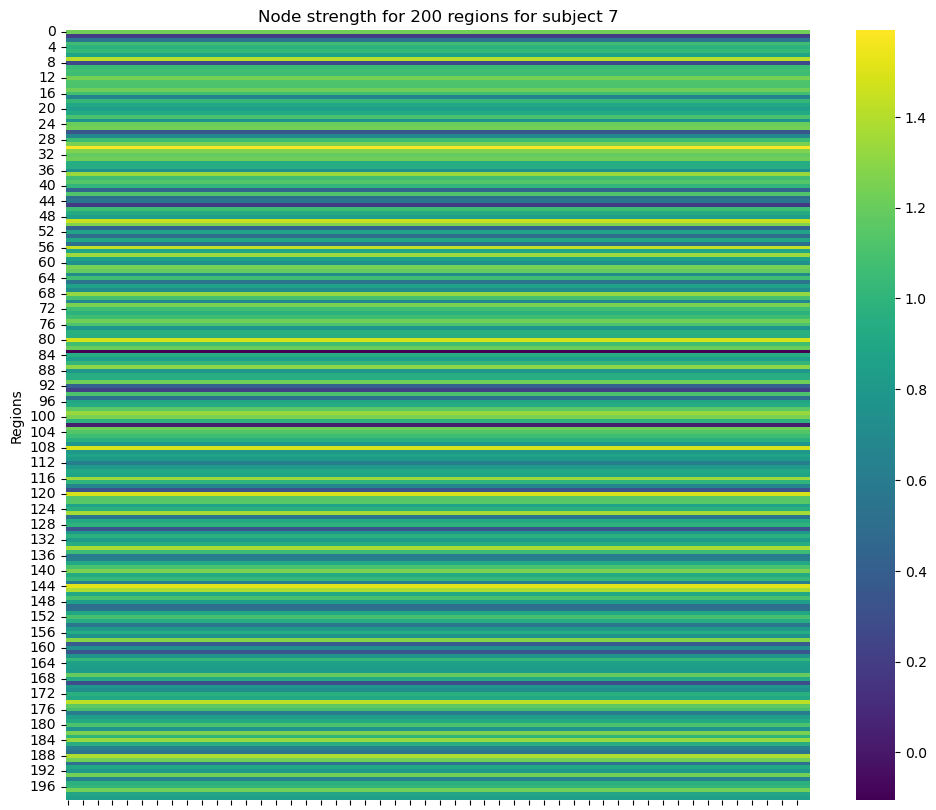

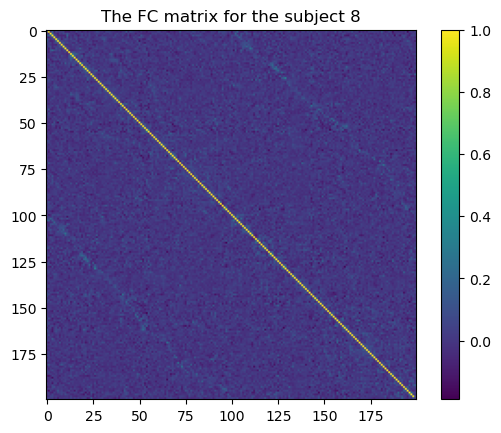

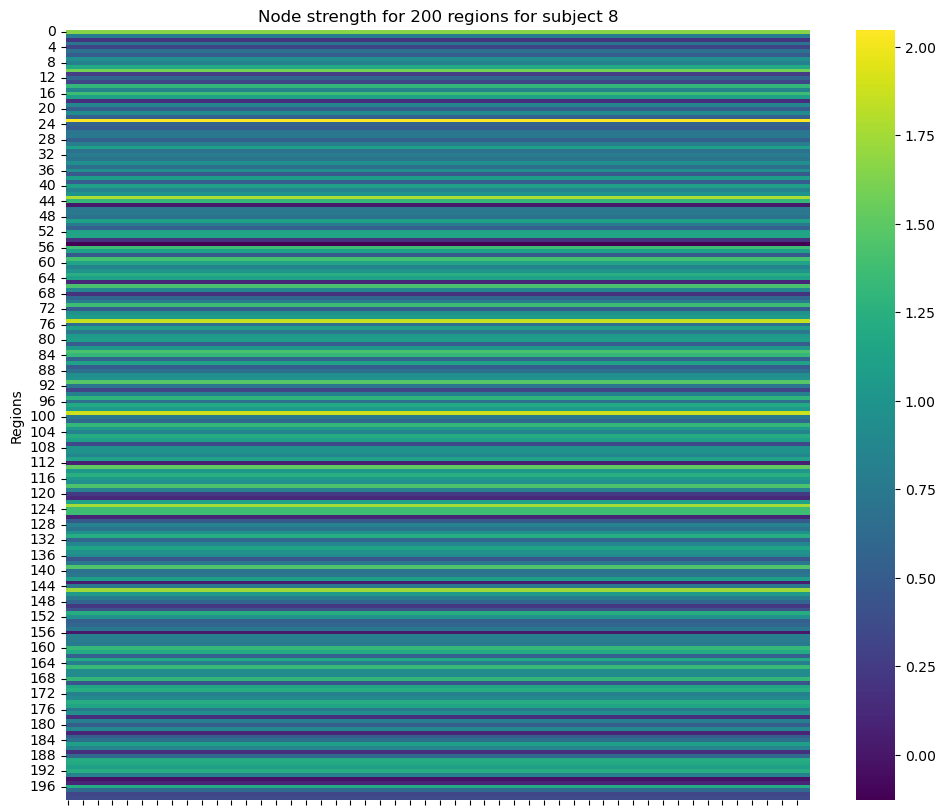

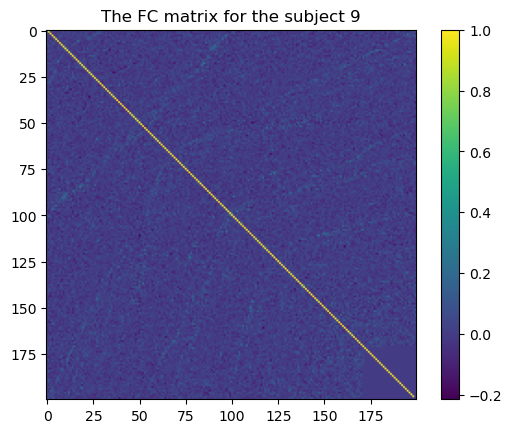

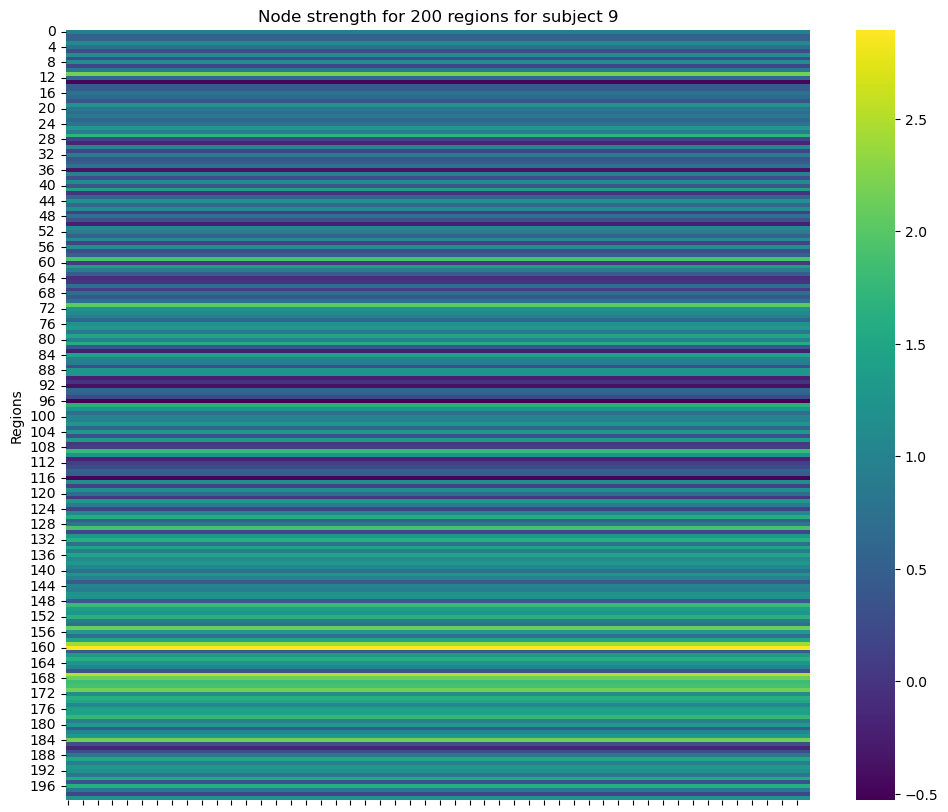

In [84]:
FCmats = np.empty((200,200))
for id in range(0,10):
    # Make row 1 into a proper matrix
    names = functional_train.columns[1:]
    row = functional_train.iloc[id]
    for n in names:
        first_num = int(re.search(r'^(\d+)', n).group(0))
        second_num = int(re.search(r'_(\d+)', n).group(0)[1:])
        FCmats[first_num][second_num] = row[n]
        FCmats[second_num][first_num] = row[n]
        highest = FCmats[first_num][second_num] if FCmats[first_num][second_num] > highest else highest
    for i in range(0,199):
        FCmats[i][i] = 1
    # Visualize the FC matrix
    plt.figure()
    plt.imshow(FCmats[:,:])
    plt.colorbar()
    plt.title('The FC matrix for the subject ' + str(id))

    # node strength visualization
    # Set the diagonal elements to 0
    FCmats[:, :][np.diag_indices(200)] = 0

    # Compute the column sums
    column_sums = np.sum(FCmats[:, :], axis=0)

    # Create a matrix with column sums for both x and y axes
    column_sums_matrix = np.outer(column_sums, np.ones(200))

    # Create labels for the 86 regions
    region_labels = [f'Region {i+1}' for i in range(200)]

    # Plot the heatmap
    plt.figure(figsize=(12, 10))  # Adjust figsize as needed
    ax =sns.heatmap(column_sums_matrix, cmap='viridis', cbar=True)
    plt.title('Node strength for 200 regions for subject ' + str(id))

    # Remove x-axis label and tick labels
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_xticklabels([])  # Remove x-axis tick labels

    # Keep y-axis label and tick labels
    plt.ylabel('Regions')
    plt.show()